In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Imports necessários
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pickle import dump
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



**Carga do DATASET**



In [ ]:
data_clientes = pd.read_csv('https://raw.githubusercontent.com/tadmonte/Sprint-4---MVP-Qualidade-de-Software-Seguran-a-e-Sistemas-Inteligentes/main/api/database/DataClientesNew.csv',delimiter=';')

In [ ]:
data_clientes.head()

,Row,receita_total,pedidos_feitos,limite,target,bom _cliente
0,1,1918.80,1,5000,5000,0
1,2,169.80,1,6000,5000,1
2,3,2198.70,2,1000,5000,0
3,4,1034.88,1,3000,5000,0
4,5,1798.80,1,6000,5000,0


In [ ]:
print(data_clientes.head())

   Row  receita_total  pedidos_feitos  limite  target  bom _cliente
0    1        1918.80               1    5000    5000             0
1    2         169.80               1    6000    5000             1
2    3        2198.70               2    1000    5000             0
3    4        1034.88               1    3000    5000             0
4    5        1798.80               1    6000    5000             0


**Separação em conjunto de treino e conjunto de teste com holdout**

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

**Separação em conjuntos de treino e teste**

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = data_clientes.values
X = array[:,0:4]
y = array[:,5]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'recall'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação


**Modelagem e InferênciaCriação e avaliação de modelos: linha base**

KNN: 1.000000 (0.000000)
CART: 0.975000 (0.075000)
NB: 0.683333 (0.238048)
SVM: 0.483333 (0.229129)


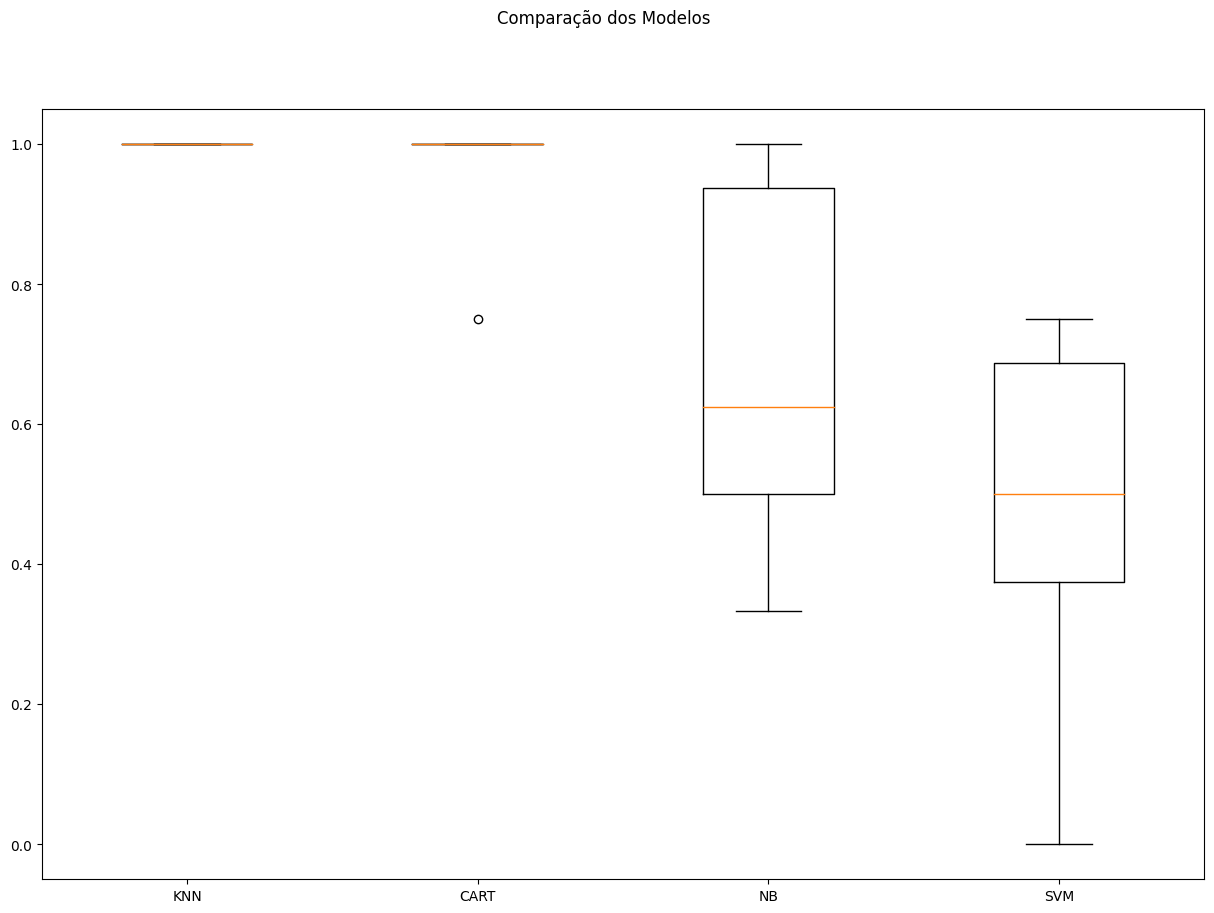

In [ ]:

np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Nesta primeira análise, vemos que o método KNN é o melhor.

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 1.000 (0.000)
CART-orig: 0.975 (0.075)
NB-orig: 0.683 (0.238)
SVM-orig: 0.483 (0.229)
KNN-padr: 0.517 (0.207)
CART-padr: 0.917 (0.129)
NB-padr: 0.783 (0.218)
SVM-padr: 0.375 (0.256)
KNN-norm: 0.517 (0.207)
CART-norm: 0.975 (0.075)
NB-norm: 0.783 (0.218)
SVM-norm: 0.375 (0.256)


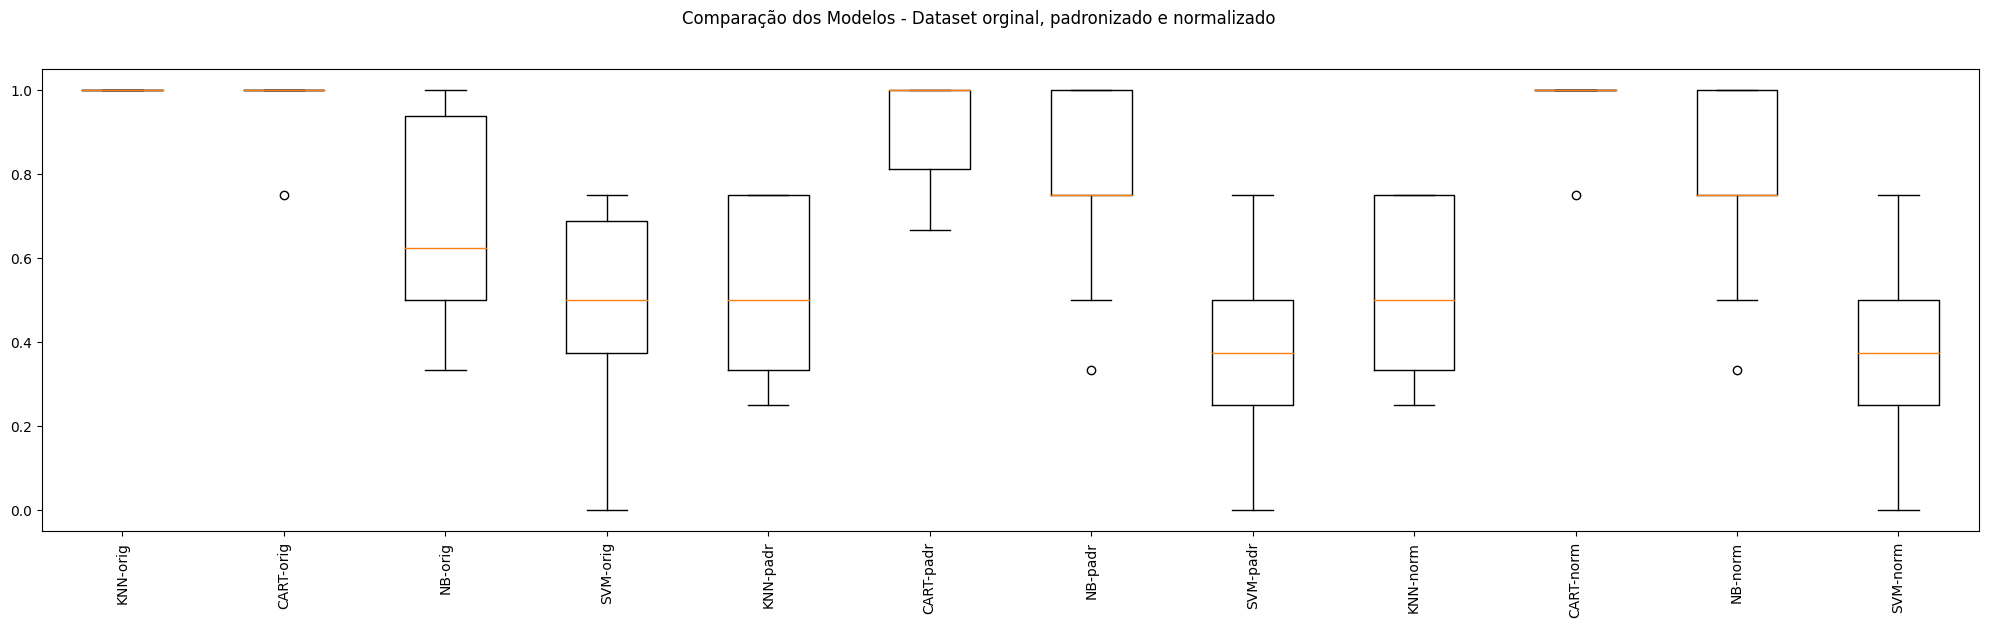

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()


Já nesta segunda análise, vemos que o melhor método é o KNN original.

Otimização dos hiperparâmetros

In [ ]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 1.000000 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-padr - Melhor: 0.675000 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}
Sem tratamento de missings: knn-norm - Melhor: 0.616667 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}


Finalização do Modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
# scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
# rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='euclidean', n_neighbors=1)
model.fit(X_train, y_train)

# Estimativa da acurácia no conjunto de teste
# rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

1.0


Simulando a aplicação do modelo em dados não vistos

In [ ]:
# Novos dados - não sabemos a classe!
data = {'Row':[4 , 5 , 6],
        'receita_total': [1950, 2600, 8500],
        'pedidos_feitos': [5, 2, 1],
        'limite': [15000, 3000, 15000],
        'target': [5000, 5000, 5000]


        }

atributos = [ 'Row','receita_total', 'pedidos_feitos', 'limite', 'target']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:4].astype(float)

# # Padronização nos dados de entrada usando o scaler utilizado em X
# rescaledEntradaX = scaler.transform(X_entrada)
# print(rescaledEntradaX)

In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(X_entrada)
print(saidas)

[1. 0. 1.]


In [ ]:
# Salva o modelo no disco
filename = 'model.pkl'
dump(model, open(filename, 'wb'))

**Conclusão**

O notebook utiliza-se de uma base de dados onde recebemos 4 informações relevantes: Receita Total, Limite, Target e Pedidos Feitos, onde analisados busca-se saber se o cliente é potencial ou não.

Para definição do modelo, quatro modelos base (KNN, Decision Tree, Naive Bayes, SVM) foram comparados usando validação cruzada estratificada.

A análise incluiu avaliações em três configurações de dados: original, padronizado e normalizado, onde foi possível perceber que o KNN original obteve o melhor resultado.

Como o KNN com métrica euclidiana e apenas 1 vizinho obteve os melhores resultados, a otimização de hiperparâmetros não foi necessária.

A avaliação final do modelo no conjunto de teste atendeu ao critério de 75% para a métrica Recall.

A simulação em novos dados mostrou a capacidade do modelo otimizado em lidar com entradas não vistas.

Por fim, o pipeline proporciona uma base sólida para futuras iterações e refinamentos do modelo. A inclusão de padronização, normalização e otimização de hiperparâmetros contribui para um desempenho robusto. A análise crítica dos resultados é essencial, destacando a importância de métricas apropriadas e uma compreensão profunda do problema em questão.





